 # Geodesicas en la métrica de Kerr

In [22]:
using Plots

In [23]:
using Interact

In [272]:
#declaracion de las constantes

M=3.5 #masa del BH
a=-0.99*M #momento angular
Re=2*M #radii 
l=4
e=0.02
h=0.01
R=(M+sqrt((M^2)-(a^2)))
r0 = 4.0*M;  
phi0 = pi/4
u0=-0.06
ti=0
tf=1000 #número de iteraciones
N=Int64(floor((tf-ti)/h))
mod=10;

In [273]:
function Δ(r)
    return (r^2)-2*M*r+a^2
end

Δ (generic function with 1 method)

In [274]:
function X(r)
    return M*(r^2)
end
function Y(r)
    return (-4*M*a*l*r)+(a^4)*e+2*e*(r^4)+(a^2)*e*(2*M*r+3*r^2)
end
function Z(r)
    return  a*(a*l-2*e*M*r)-l*Δ(r)
end

Z (generic function with 1 method)

In [275]:
function f0(r,phi)
   return (1/Δ(r))*((1-(2*M/r))l+(2*M*a/r)*e)
  # return (l/r^2)
end

f0 (generic function with 1 method)

In [276]:
function f1(r,phi,u)
    return u
end

f1 (generic function with 1 method)

In [277]:
function f2(r,phi,u)
return  (((X(r)*Z(r))*(a*Z(r)-(1/4)*Y(r))+(r^4-a^4)*Z(r)*Z(r))/(Δ(r)*r^(10)))
#   return ((l^2)/(r^3))-(M/r^2)
    #return (l^2)/(r^4)-(2*M*(l^2))/(r^5)-(e*M)/((r^2)-2*M*r)
end

f2 (generic function with 1 method)

In [278]:
function RK4(r_0, phi_0, u_0,Nt)
    
    x=zeros((Nt/mod)+1)
    y=zeros((Nt/mod)+1)
   
    x[1]=r_0*cos(phi_0)
    y[1]=r_0*sin(phi_0)
    j=1
    
    count=0
    
    for i in 1:Nt
        

        k1 = h*f1(r_0, phi_0,u_0)
        l1 = h*f2(r_0, phi_0,u_0)
        m1 = h*f0(r_0,phi_0)    

        k2 = h*f1(r_0+0.5*h, phi_0+0.5*k1,u_0+0.5*l1)
        l2 = h*f2(r_0+0.5*h, phi_0+0.5*k1,u_0+0.5*l1)
        m2 = h*f0(r_0+0.5*h, phi_0+0.5*m1)

        k3 = h*f1(r_0+0.5*h, phi_0+0.5*k2, u_0+0.5*l2)
        l3 = h*f2(r_0+0.5*h, phi_0+0.5*k2, u_0+0.5*l2)
        m3 = h*f0(r_0+0.5*h, phi_0+0.5*m2)

        k4 = h*f1(r_0+0.5*h, phi_0+k3, u_0+l3)
        l4 = h*f2(r_0+0.5*h, phi_0+k3, u_0+l3)
        m4 = h*f0(r_0+0.5*h, phi_0+m3)

        r_new = r_0 + (1/6)*(k1 + 2.0*k2 + 2.0*k3 + k4)
        u_new = u_0 + (1/6)*(l1 + 2.0*l2 + 2.0*l3 + l4)
        phi_new=phi_0+(1/6)*(m1 + 2.0*m2 + 2.0*m3 + m4)

        
        r_0=r_new
        phi_0=phi_new
        u_0=u_new    
    if (r_new<=R)
            break
        end
        if(count % mod==0) 
            
            x[j+1]=r_new*cos(phi_new)
            y[j+1]=r_new*sin(phi_new)
            
            j=j+1
        end
       
    count=count+1 
    end   
    return x,y
    
end

RK4 (generic function with 1 method)

In [279]:
xx,yy=RK4(r0,phi0,u0,N)

([9.89949, 9.8973, 9.87537, 9.8534, 9.83141, 9.80939, 9.78735, 9.76527, 9.74317, 9.72104  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.89949, 9.90084, 9.91425, 9.92763, 9.94098, 9.9543, 9.96758, 9.98083, 9.99404, 10.0072  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

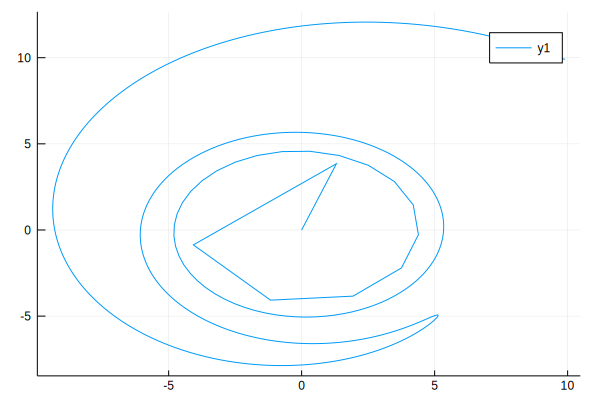

In [280]:
plot(xx,yy)

In [281]:
function array(x,j)
    v=[]
    for i in 1:j
        push!(v,x[i])
    end
    return v
end


array (generic function with 1 method)

In [282]:
function ch1(x)
    return sqrt(R^2-x^2)
end
function ch2(x)
    return -sqrt(R^2-x^2)
end
function ce1(x)
    return sqrt(Re^2-x^2)
end
function ce2(x)
    return -sqrt(Re^2-x^2)
end

ce2 (generic function with 2 methods)

In [283]:
x_min=minimum(xx)
x_max=maximum(xx)

y_min=minimum(yy)
y_max=maximum(yy)

 anim = @animate for i in 1:35:length(xx)
    xx_i=array(xx,i)
    yy_i=array(yy,i)
    
    x=[xx[i]]
    y=[yy[i]]
    
   xxh=linspace(-R,R, 100)
    xxe=linspace(-Re,Re, 100)
    plot(xxh,[ch1(x) for x in xxh],aspect_ratio=1, color="black", label="",xlim=(x_min,x_max),ylim=(y_min,y_max))
    plot!(xxh,[ch2(x) for x in xxh],color="black",label="")
     plot!(xxe,[ce1(x) for x in xxe],color="red",label="")
     plot!(xxe,[ce2(x) for x in xxe],color="red",label="")
    plot!(xx_i,yy_i,label="")
    scatter!(x,y,label="")
    
end
gif(anim, "kerr.gif", fps=30)

Plots.AnimatedGif("/Users/luismartinezrojas/Documents/Julia/proyecto/kerr.gif")